In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

**Загрузка датасета:**

In [2]:
df = pd.read_csv("data/Ship_Performance_Dataset.csv")
df.head()

Date       Ship_Type    Route_Type           Engine_Type  \
0  2023-06-04  Container Ship           NaN  Heavy Fuel Oil (HFO)   
1  2023-06-11    Fish Carrier    Short-haul         Steam Turbine   
2  2023-06-18  Container Ship     Long-haul                Diesel   
3  2023-06-25    Bulk Carrier  Transoceanic         Steam Turbine   
4  2023-07-02    Fish Carrier  Transoceanic                Diesel   

  Maintenance_Status  Speed_Over_Ground_knots  Engine_Power_kW  \
0           Critical                12.597558      2062.983982   
1               Good                10.387580      1796.057415   
2               Fair                20.749747      1648.556685   
3               Fair                21.055102       915.261795   
4               Fair                13.742777      1089.721803   

   Distance_Traveled_nm  Draft_meters Weather_Condition  Cargo_Weight_tons  \
0           1030.943616     14.132284          Moderate        1959.017882   
1           1060.486382     14.653083             Rough         162.394712   
2            658.874144      7.199261          Moderate         178.040917   
3           1126.822519     11.789063          Moderate        1737.385346   
4           1445.281159      9.727833          Moderate         260.595103   

   Operational_Cost_USD  Revenue_per_Voyage_USD  Turnaround_Time_hours  \
0         483832.354540           292183.273104              25.867077   
1         483388.000509           883765.787360              63.248196   
2         448543.404044           394018.746904              49.418150   
3         261349.605449            87551.375175              22.409110   
4         287718.375160           676121.459632              64.158231   

   Efficiency_nm_per_kWh  Seasonal_Impact_Score  Weekly_Voyage_Count  \
0               1.455179               1.415653                    1   
1               0.290361               0.885648                    6   
2               0.499595               1.405813                    9   
3               0.702906               1.370704                    1   
4               1.331343               0.583383                    8   

   Average_Load_Percentage  
0                93.769249  
1                93.895372  
2                96.218244  
3                66.193698  
4                80.008581

**Числовые признаки:**

* **Speed_Over_Ground_knots**: Средняя скорость корабля в узлах.
* **Engine_Power_kW**: Мощность двигателя в кВт.
* **Distance_Traveled_nm**: Общий путь, пройденный кораблём, в морских милях.
* **Operational_Cost_USD**: Операционная стоимость маршрута в долларах.
* **Revenue_per_Voyage_USD**: Выручка с маршрута в долларах.
* **Efficiency_nm_per_kWh**: Энергоэффективность в морских милях на кВт.


**Категориальные признаки:**

* **Ship_Type**: Тип судна (например: Tanker, Container Ship, Fish Carrier, Bulk Carrier).
* **Route_Type**: Тип маршрута (например: Short-haul, Long-haul, Transoceanic).
* **Engine_Type**: Тип двигателя (например: Diesel, Heavy Fuel Oil).
* **Maintenance_Status**: Качество обслуживания корабля (например: Fair, Critical, Good).
* **Weather_Condition**: Состояние погоды на момент рейса (например: Calm, Moderate, Rough).

**Общая информация о датасете**: названия колонок, количество ненулевых значений в каждой колонке, тип данных в каждой колонке.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

**Меры центральной тенденции и изменчивости для числовых признаков:**

In [4]:
df.describe()

Speed_Over_Ground_knots  Engine_Power_kW  Distance_Traveled_nm  \
count              2736.000000      2736.000000           2736.000000   
mean                 17.602863      1757.610939           1036.406203   
std                   4.311979       717.002777            568.632080   
min                  10.009756       501.025220             50.433150   
25%                  13.928452      1148.104914            548.511573   
50%                  17.713757      1757.494344           1037.816060   
75%                  21.284785      2382.594292           1540.934161   
max                  24.997043      2998.734329           1998.337057   

       Draft_meters  Cargo_Weight_tons  Operational_Cost_USD  \
count   2736.000000        2736.000000           2736.000000   
mean       9.929103        1032.573264         255143.344488   
std        2.876423         558.697499         140890.482189   
min        5.001947          50.229624          10092.306318   
25%        7.437485         553.983629         131293.378767   
50%        9.918965        1043.207497         257157.653226   
75%       12.413149        1527.722391         381796.930499   
max       14.992947        1999.126697         499734.867868   

       Revenue_per_Voyage_USD  Turnaround_Time_hours  Efficiency_nm_per_kWh  \
count             2736.000000            2736.000000            2736.000000   
mean            521362.062011              41.747536               0.798656   
std             271211.625499              17.633130               0.403590   
min              50351.814447              12.019909               0.100211   
25%             290346.388017              26.173537               0.463592   
50%             520176.931762              41.585188               0.789877   
75%             750072.791216              57.363922               1.147426   
max             999916.696140              71.972415               1.499259   

       Seasonal_Impact_Score  Weekly_Voyage_Count  Average_Load_Percentage  
count            2736.000000          2736.000000              2736.000000  
mean                1.003816             4.914839                75.219222  
std                 0.288251             2.597647                14.510168  
min                 0.500004             1.000000                50.012005  
25%                 0.758033             3.000000                62.703724  
50%                 1.009009             5.000000                75.504709  
75%                 1.252808             7.000000                87.721205  
max                 1.499224             9.000000                99.999643

**Подсчёт количества пропущенных значений в каждой колонке:**

In [5]:
df.isnull().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

**Построение корреляционной матрицы для числовых признаков датасета:**

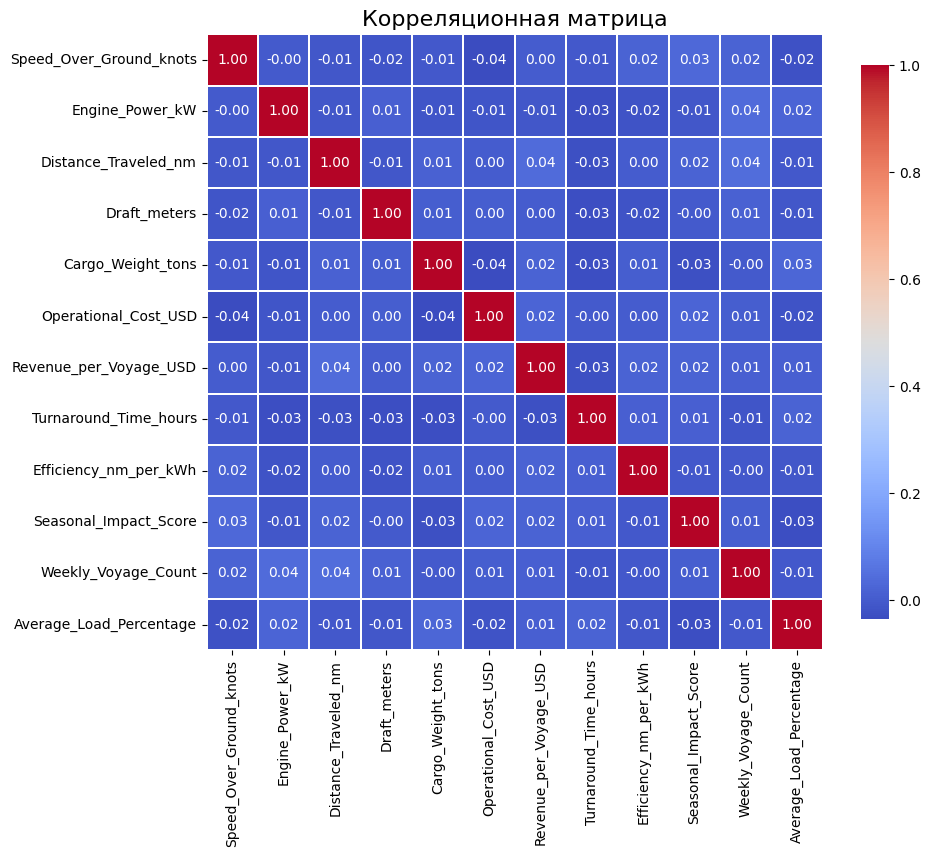

In [4]:
corr = df.corr(numeric_only=True) 

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=0.2, cbar_kws={"shrink": .9})

plt.title('Корреляционная матрица', fontsize=16)
plt.show()

Результат выше (линейную независимость между всеми числовыми признаками) можно объяснить тем, что датасет сгенерирован искусственно с целью создать поле для использования моделей машинного обучения и решения задач регрессии, классификации и кластеризации, которые требуют линейную независимость между признаками, которые используются при обучении и тесте модели.

**Распределение числовых признаков:**

In [11]:
df.columns

Index(['Date', 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons',
       'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')

array([[<Axes: title={'center': 'Speed_Over_Ground_knots'}>,
        <Axes: title={'center': 'Engine_Power_kW'}>,
        <Axes: title={'center': 'Distance_Traveled_nm'}>],
       [<Axes: title={'center': 'Draft_meters'}>,
        <Axes: title={'center': 'Cargo_Weight_tons'}>,
        <Axes: title={'center': 'Operational_Cost_USD'}>],
       [<Axes: title={'center': 'Revenue_per_Voyage_USD'}>,
        <Axes: title={'center': 'Turnaround_Time_hours'}>,
        <Axes: title={'center': 'Efficiency_nm_per_kWh'}>],
       [<Axes: title={'center': 'Seasonal_Impact_Score'}>,
        <Axes: title={'center': 'Weekly_Voyage_Count'}>,
        <Axes: title={'center': 'Average_Load_Percentage'}>]],
      dtype=object)

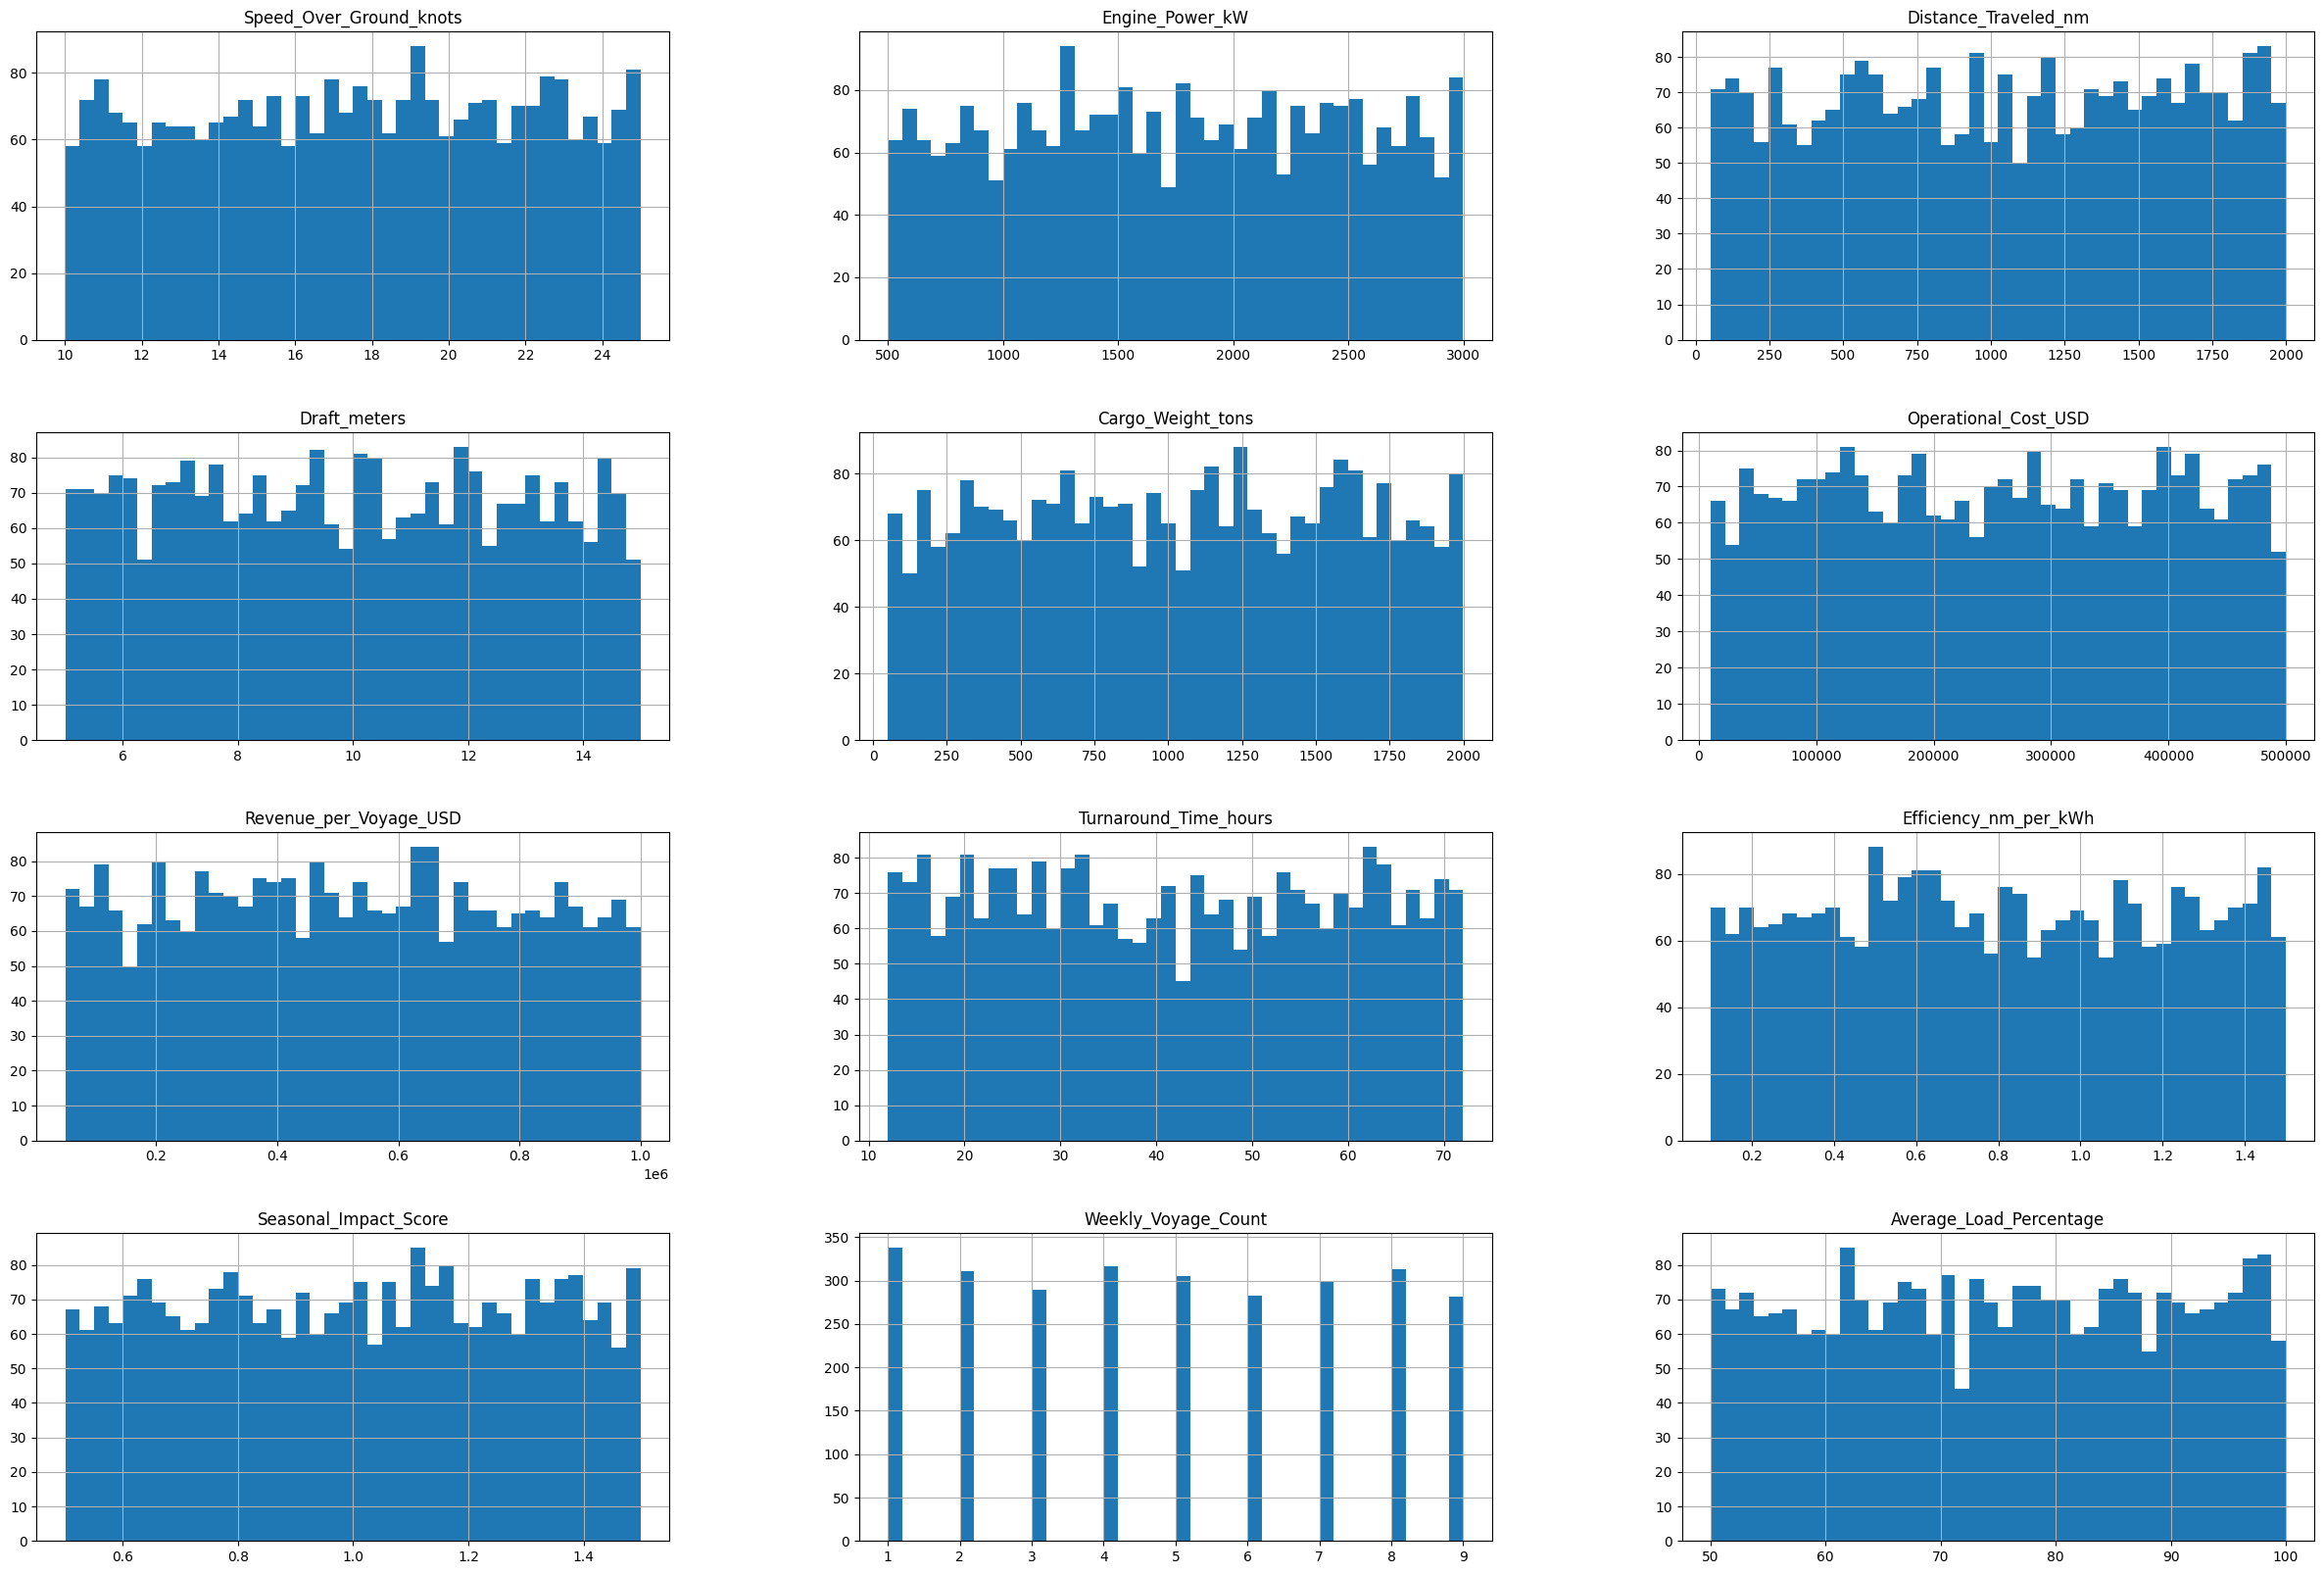

In [5]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical].hist(figsize=(30, 20), bins=40)

На всех графиках, построенных выше, отчётливо видно, что распределение у всех числовых признаков близко к равномерному, что ещё раз можно объяснить "синтетичностью" датасета.

**Построение ящиков с усами для оценки изменчивости данных:**

Используется **Z-score** нормализация для приведения данных к одному масштабу для того, чтобы получить возможность более наглядно интерпретировать boxplot'ы на одном plot'e.

In [8]:
scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[numerical]), columns=df[numerical].columns)

<Axes: >

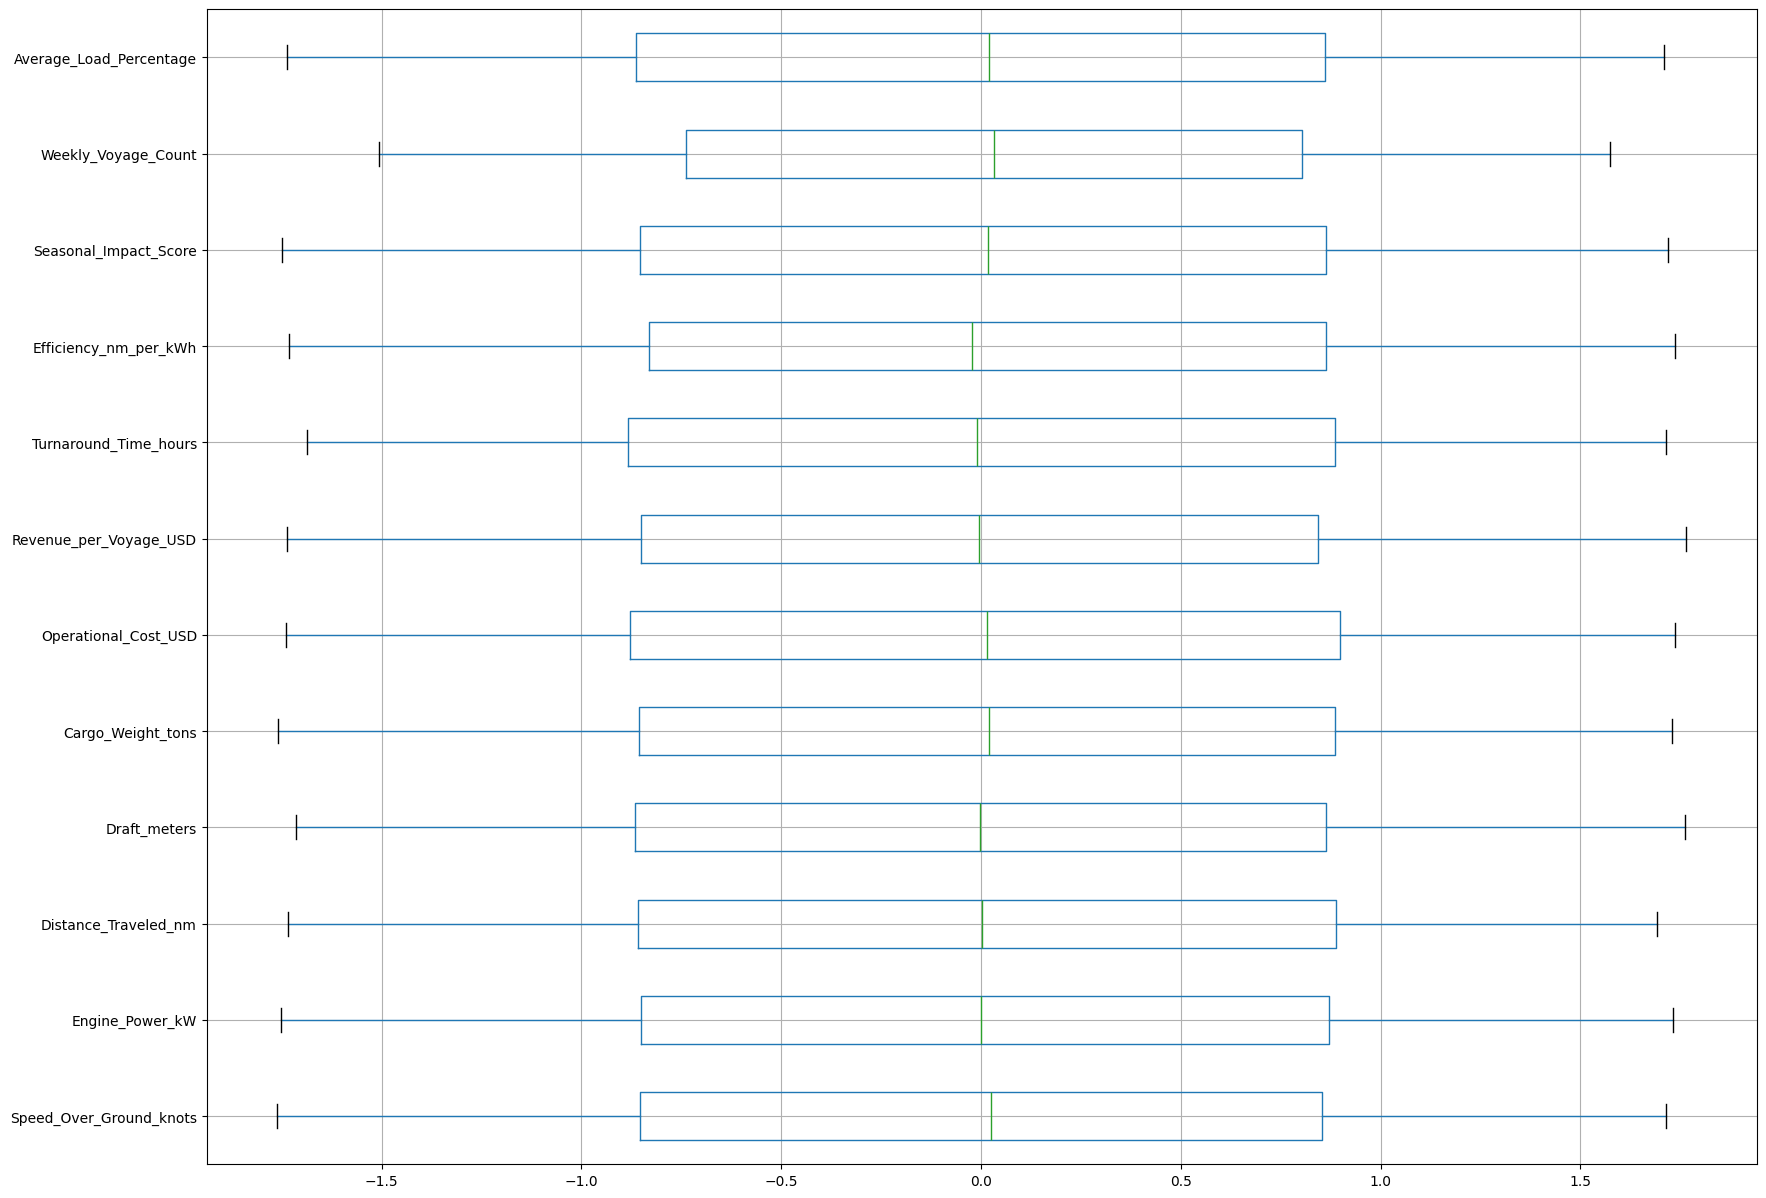

In [9]:
df_norm[numerical].boxplot(vert=False, figsize=(20,15))

На графике видно, что ни один из числовых признаков не имеет выбросов (за усами ничего нет)! Ещё один звоночек-напоминание о том, что данные синтетические. Более того, отчётливо видно, что среднее слабо отличается от медианы для всех числовых признаков, это ещё раз подтверждает отсутсвие выбросов. 

Ещё можно построить диаграммы рассеяния и посмотреть, как они соотносятся с корреляционной матрицей. Да, корреляции околонулевые, но это не значит, что данные могут быть зависимы **нелинейно**!

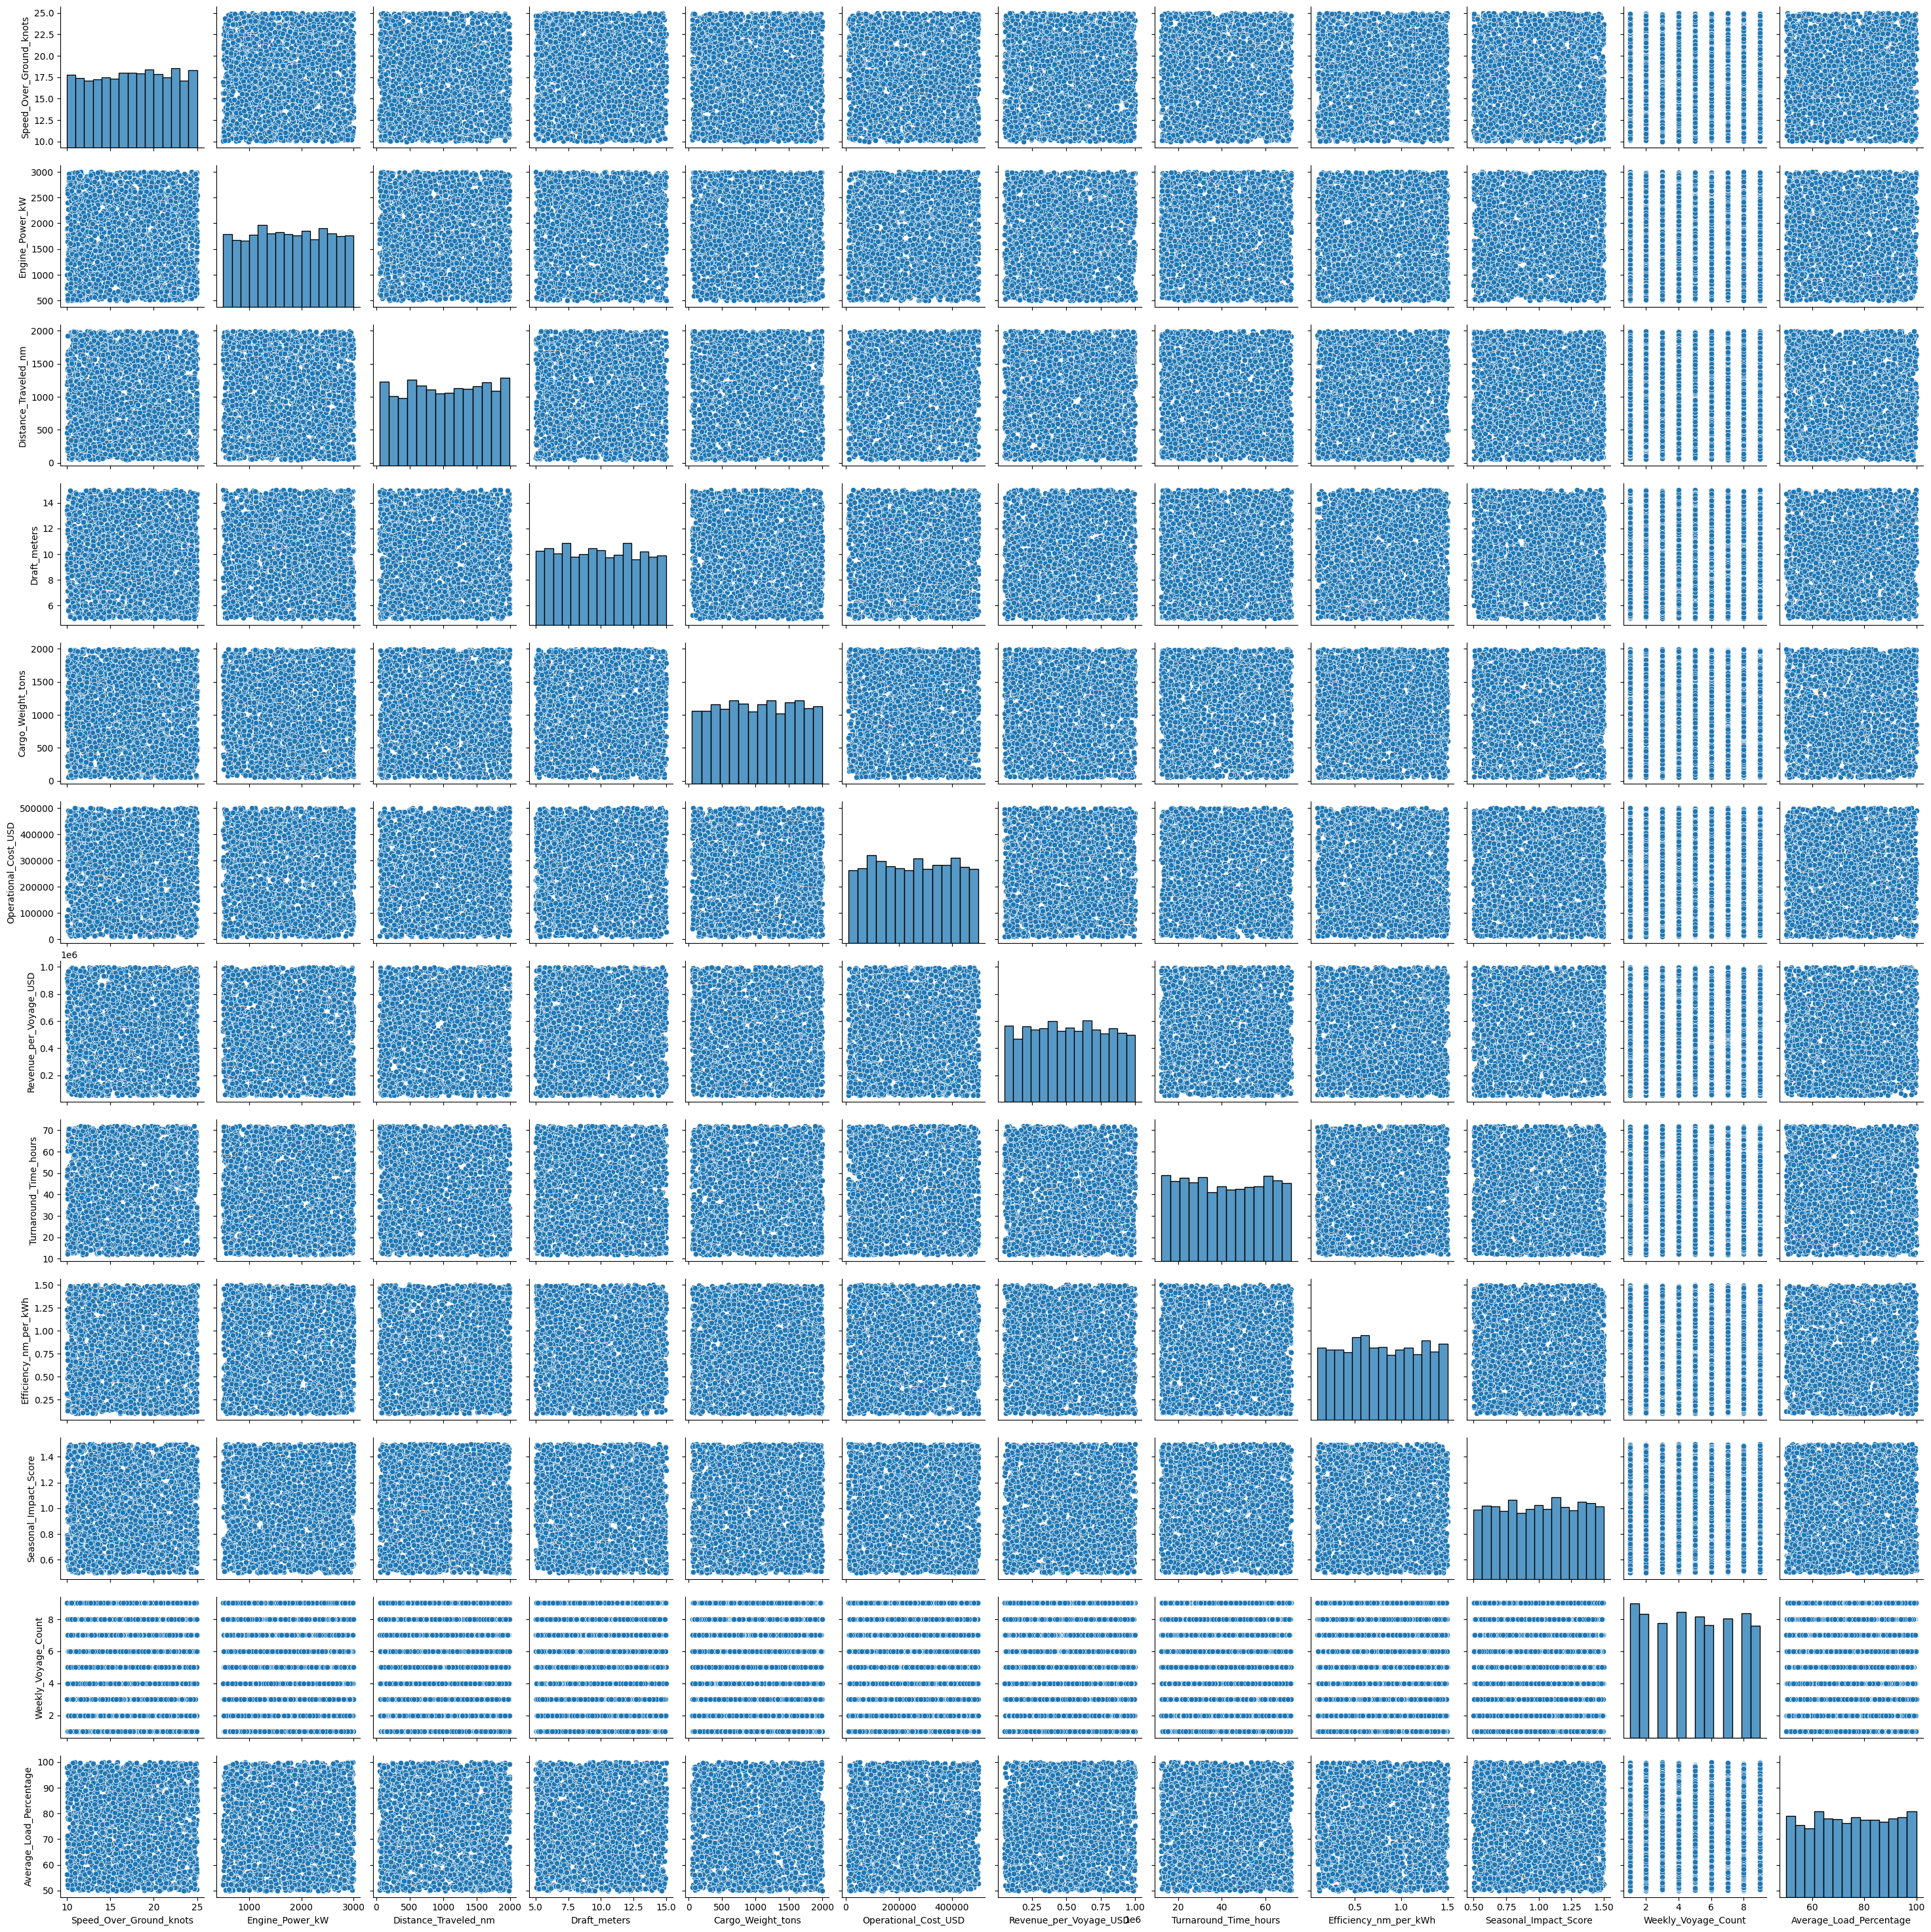

In [10]:
sns.pairplot(df[numerical])

Теперь железобетонно синтетические.. Как и показала корреляционная матрица, получаем отсутствие линейной, да и в целом какой-либо зависимости между числовыми признаками.

In [6]:
df[numerical].max()

Speed_Over_Ground_knots        24.997043
Engine_Power_kW              2998.734329
Distance_Traveled_nm         1998.337057
Draft_meters                   14.992947
Cargo_Weight_tons            1999.126697
Operational_Cost_USD       499734.867868
Revenue_per_Voyage_USD     999916.696140
Turnaround_Time_hours          71.972415
Efficiency_nm_per_kWh           1.499259
Seasonal_Impact_Score           1.499224
Weekly_Voyage_Count             9.000000
Average_Load_Percentage        99.999643
dtype: float64

In [7]:
df[numerical].min()

Speed_Over_Ground_knots       10.009756
Engine_Power_kW              501.025220
Distance_Traveled_nm          50.433150
Draft_meters                   5.001947
Cargo_Weight_tons             50.229624
Operational_Cost_USD       10092.306318
Revenue_per_Voyage_USD     50351.814447
Turnaround_Time_hours         12.019909
Efficiency_nm_per_kWh          0.100211
Seasonal_Impact_Score          0.500004
Weekly_Voyage_Count            1.000000
Average_Load_Percentage       50.012005
dtype: float64

Ещё раз хочется посмотреть на то, что из себя представляют числовые признаки (минимум/максимум, меры центральной тенденции, меры изменчивости..), чтобы написать тесты на данные.

In [8]:
df[numerical].describe()

Speed_Over_Ground_knots  Engine_Power_kW  Distance_Traveled_nm  \
count              2736.000000      2736.000000           2736.000000   
mean                 17.602863      1757.610939           1036.406203   
std                   4.311979       717.002777            568.632080   
min                  10.009756       501.025220             50.433150   
25%                  13.928452      1148.104914            548.511573   
50%                  17.713757      1757.494344           1037.816060   
75%                  21.284785      2382.594292           1540.934161   
max                  24.997043      2998.734329           1998.337057   

       Draft_meters  Cargo_Weight_tons  Operational_Cost_USD  \
count   2736.000000        2736.000000           2736.000000   
mean       9.929103        1032.573264         255143.344488   
std        2.876423         558.697499         140890.482189   
min        5.001947          50.229624          10092.306318   
25%        7.437485         553.983629         131293.378767   
50%        9.918965        1043.207497         257157.653226   
75%       12.413149        1527.722391         381796.930499   
max       14.992947        1999.126697         499734.867868   

       Revenue_per_Voyage_USD  Turnaround_Time_hours  Efficiency_nm_per_kWh  \
count             2736.000000            2736.000000            2736.000000   
mean            521362.062011              41.747536               0.798656   
std             271211.625499              17.633130               0.403590   
min              50351.814447              12.019909               0.100211   
25%             290346.388017              26.173537               0.463592   
50%             520176.931762              41.585188               0.789877   
75%             750072.791216              57.363922               1.147426   
max             999916.696140              71.972415               1.499259   

       Seasonal_Impact_Score  Weekly_Voyage_Count  Average_Load_Percentage  
count            2736.000000          2736.000000              2736.000000  
mean                1.003816             4.914839                75.219222  
std                 0.288251             2.597647                14.510168  
min                 0.500004             1.000000                50.012005  
25%                 0.758033             3.000000                62.703724  
50%                 1.009009             5.000000                75.504709  
75%                 1.252808             7.000000                87.721205  
max                 1.499224             9.000000                99.999643